In [1]:
import pandas as pd


In [2]:
#Vamos carregar os dados já pré tratados dos times que foram os selecionados e dos jogos com suas respectivas odds.

df_times = pd.read_csv('Times_odd_abaixo_6.5.csv')

df_bet = pd.read_csv('Bet_times_menos_6.5.csv')
df_bet.head()



,Temporada,home_team_api_id,away_team_api_id,B365H,B365A,date,home_team_goal,away_team_goal,odd_team_win,Team_win
0,2008/2009,9984,8635,2.38,2.75,2008-08-16 00:00:00,0,3,2.75,1
1,2008/2009,9991,9998,1.44,7.50,2008-08-17 00:00:00,5,0,1.44,1
2,2008/2009,7947,9985,5.00,1.65,2008-08-16 00:00:00,1,3,1.65,1
3,2008/2009,9985,9986,1.30,9.50,2008-10-31 00:00:00,1,2,1.30,0
4,2008/2009,10000,9991,2.60,2.50,2008-11-02 00:00:00,0,2,2.50,1


In [3]:
# Calcular algumas novas colunas de relevancia para nossa analise, colocando o nome do time "favorito" em cada rodada

df_bet = df_bet.merge(df_times, left_on = 'home_team_api_id',right_on='team_api_id', how = 'left').merge(df_times, left_on = 'away_team_api_id',right_on='team_api_id', how = 'left')   

df_bet = df_bet.drop(columns=(['team_api_id_x','team_api_id_y']))
df_bet['team_long_name_x'] = df_bet['team_long_name_x'].fillna(' ')
df_bet['team_long_name_y'] = df_bet['team_long_name_y'].fillna(' ')
df_bet['team_long_name'] = df_bet['team_long_name_x'] + df_bet['team_long_name_y']

df_bet = df_bet.drop(columns=(['team_long_name_x','team_long_name_y']))

#Vamos agora calcular uma nova coluna chamada Resultado, levando em consideração que "Apostaremos" 100 unidades na vitória do favorito em cada rodada
# Caso a vitória aconteça, ganhamos a odd*100 -100. Caso o favorito perca, perdemos todo o apostado.

def resultado(df):
    if df['Team_win'] == 0:
        return -100
    else:
        return (df['odd_team_win']*100 -100)

df_bet['Resultado'] = df_bet.apply(resultado, axis = 1)
df_bet.head()
df_bet.shape



(4637, 12)

In [4]:
# Vamos retirar os confrontos diretos entre favoritos para não influenciar na análise.

list_teams = df_times['team_api_id'].to_list()

df_bet = df_bet.loc[~(df_bet['home_team_api_id'].isin(list_teams) & df_bet['away_team_api_id'].isin(list_teams))]
df_bet.shape


(4435, 12)

In [5]:
# Vamos criar um range de odds para simplificar a análise gráfica. Pulando de 0.25, cada grupo de odd tem um delta de 0.25
ranges = [1.05,1.25,1.5,1.75,2,2.25,2.5,2.75,3.0,3.25,3.5,3.75,4.0,4.25,4.5,4.75,5.0]
group_names = ['1.00-1.25','1.25-1.50','1.50-1.75','1.75-2.0','2.00-2.25','2.25-2.50','2.50-2.75','2.75-3.0','3.00-3.25','3.25-3.50'
               ,'3.50-3.75','3.75-4.0','4.00-4.25','4.25-4.50','4.50-4.75','4.75-5.0']

df_bet['odd_agrupadas'] = pd.cut(df_bet['odd_team_win'], bins = ranges, labels = group_names)

In [6]:
df_bet.head()

,Temporada,home_team_api_id,away_team_api_id,B365H,B365A,date,home_team_goal,away_team_goal,odd_team_win,Team_win,team_long_name,Resultado,odd_agrupadas
0,2008/2009,9984,8635,2.38,2.75,2008-08-16 00:00:00,0,3,2.75,1,RSC Anderlecht,175.0,2.50-2.75
1,2008/2009,9991,9998,1.44,7.50,2008-08-17 00:00:00,5,0,1.44,1,KAA Gent,44.0,1.25-1.50
2,2008/2009,7947,9985,5.00,1.65,2008-08-16 00:00:00,1,3,1.65,1,Standard de Liège,65.0,1.50-1.75
3,2008/2009,9985,9986,1.30,9.50,2008-10-31 00:00:00,1,2,1.30,0,Standard de Liège,-100.0,1.25-1.50
4,2008/2009,10000,9991,2.60,2.50,2008-11-02 00:00:00,0,2,2.50,1,KAA Gent,150.0,2.25-2.50


In [7]:
# Agora iremos agrupar pelo range criado, tendo assim o Resultado por ODD.

df_bet1 = df_bet.groupby('odd_agrupadas').sum()

df_bet1 = df_bet1.reset_index(level=0)
df_bet1 = df_bet1.sort_values('odd_agrupadas')
df_bet1.head(10)


,odd_agrupadas,home_team_api_id,away_team_api_id,B365H,B365A,home_team_goal,away_team_goal,odd_team_win,Team_win,Resultado
0,1.00-1.25,11837113,12896098,3626.84,16816.48,3088,1092,1438.82,1026,-483.0
1,1.25-1.50,13107732,13279808,6062.64,7273.00,2154,1862,1835.89,946,-3647.0
2,1.50-1.75,8623191,8120194,3587.05,2484.62,1045,1327,1376.17,526,1035.0
3,1.75-2.0,4132898,3580583,1414.37,920.55,464,639,729.70,194,-2040.0
4,2.00-2.25,2243904,1982368,679.06,498.35,259,306,456.80,87,-2465.0
5,2.25-2.50,1527132,1547585,474.98,407.50,200,253,393.34,78,2340.0
6,2.50-2.75,715592,719057,201.92,206.62,98,123,205.11,36,1907.0
7,2.75-3.0,646006,651495,175.85,200.35,100,79,203.11,15,-2678.0
8,3.00-3.25,257706,265662,69.70,83.23,55,34,88.20,7,-590.0
9,3.25-3.50,120830,126088,29.80,42.75,17,12,44.10,1,-970.0


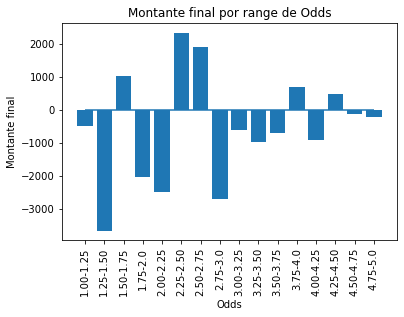

In [8]:
#Realizar a primeira visualização gráfica do nosso estudo

import matplotlib.pyplot as plt

x = df_bet1['odd_agrupadas']
y = df_bet1['Resultado']

plt.bar(x,y)
plt.title('Montante final por range de Odds')
plt.xticks(rotation=90)
plt.xlabel('Odds')
plt.ylabel('Montante final')
plt.hlines(0,0,15)
plt.show()



0        175.0
1        219.0
2        284.0
3        184.0
4        334.0
         ...  
4632   -8655.0
4633   -8641.0
4634   -8633.0
4635   -8622.0
4636   -8531.0
Name: Resultado, Length: 4435, dtype: float64


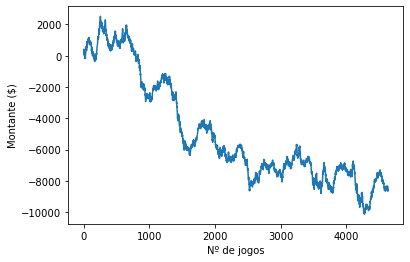

In [9]:
# Vamos ver como fica uma soma acumulada das apostas na vitoria do "favorito"
df_bet.head()

xx = df_bet['Resultado'].cumsum()
print(xx)
plt.plot(xx)
plt.xlabel('Nº de jogos')
plt.ylabel('Montante ($)')
plt.show()

In [10]:
#Vamos identificar se as probabilidades de vitória pré jogo se justificam e são compatíveis com as porcentagens de vitória que realmente aconteceu


df_bet2 = df_bet.groupby('odd_team_win')
df_bet2 = df_bet2['Team_win'].value_counts()
df_bet2 = df_bet2.reset_index(name ='Count')

df_bet2.head()
   

for i in range(len(df_bet2)):
    i = i + 1
    df_bet2['total_partidas'] = df_bet2['Count']


df_bet3 = df_bet2.groupby('odd_team_win').sum()
df_bet3 = df_bet3.reset_index()
df_bet3 = df_bet3.drop(columns=['Team_win','total_partidas'])

df_bet2 = df_bet2.merge(df_bet3,on = 'odd_team_win',how= 'left')

df_bet2 = df_bet2.drop(columns=['total_partidas'])
df_bet2 = df_bet2.rename(columns={'Count_y':'total_partidas'})

df_bet2['probabilidade_assistida'] = (df_bet2['Count_x']/df_bet2['total_partidas'])
df_bet2.head(20)

df_bet2['probabilidade'] = 1

i = -1


for x in df_bet2['Team_win']:
    i = i + 1
    if df_bet2['Team_win'][i] == 1:
        df_bet2['probabilidade'][i] = 1/(df_bet2.at[i, 'odd_team_win'])
        
        # USAR A FUNÇÃO AT DO PANDAS

    if df_bet2['Team_win'][i] == 0:
        
        df_bet2['probabilidade'][i] = 1 - (1.0/(df_bet2.at[i,'odd_team_win']))
        
     

df_bet2[30:70]


   




C:\Users\victo\AppData\Local\Temp\ipykernel_15732\2300491358.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bet2['probabilidade'][i] = 1/(df_bet2.at[i, 'odd_team_win'])


,odd_team_win,Team_win,Count_x,total_partidas,probabilidade_assistida,probabilidade
30,1.29,1,142,176,0.806818,0.775194
31,1.29,0,34,176,0.193182,0.224806
32,1.30,1,101,118,0.855932,0.769231
33,1.30,0,17,118,0.144068,0.230769
34,1.33,1,155,213,0.727700,0.751880
35,1.33,0,58,213,0.272300,0.248120
36,1.36,1,143,207,0.690821,0.735294
37,1.36,0,64,207,0.309179,0.264706
38,1.40,1,159,223,0.713004,0.714286
39,1.40,0,64,223,0.286996,0.285714


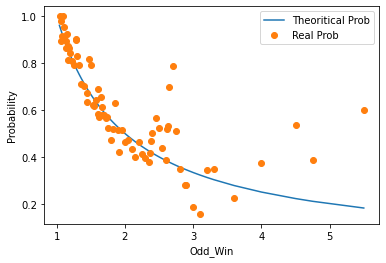

In [37]:

#Vamos organizar para plotar e comparar a porcentagem de vitórias ocorridas e a probabilidade delas ocorrerem na teoria

df_win = df_bet2.loc[df_bet2['Team_win'] == 1]


df_loss = df_bet2.loc[df_bet2['Team_win'] == 0]

prob_win_real = df_win['probabilidade_assistida'].rolling(window= 2).mean()
prob_win_teoric = df_win['probabilidade']



plt.plot(df_win['odd_team_win'],prob_win_teoric, label = 'Theoritical Prob')
plt.plot(df_win['odd_team_win'],prob_win_real, 'o', label = 'Real Prob')
plt.xlabel('Odd_Win')
plt.ylabel('Probability')
plt.legend()

prob_loss_real = df_loss['probabilidade_assistida']
prob_loss_teoric = df_loss['probabilidade']


plt.show()
